## 생존분석 패키지 설치

In [1]:
!pip install lifelines

  Running setup.py bdist_wheel for autograd: started
  Running setup.py bdist_wheel for autograd: finished with status 'done'
  Stored in directory: C:\Users\eupho\AppData\Local\pip\Cache\wheels\42\62\66\1121afe23ff96af4e452e0d15e68761e3f605952ee075ca99f
  Running setup.py bdist_wheel for future: started
  Running setup.py bdist_wheel for future: finished with status 'done'
  Stored in directory: C:\Users\eupho\AppData\Local\pip\Cache\wheels\0c\61\d2\d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built autograd future


## 암 생존(cancer.csv) 데이터 열기

In [2]:
import pandas

In [5]:
cancer = pandas.read_csv('cancer.csv', index_col=0)

In [6]:
cancer.head()

,type,time,delta
1,1,1,1
2,1,3,1
3,1,3,1
4,1,4,1
5,1,10,1


In [17]:
cancer.query('delta == 0')  # delta == 0인 경우, 즉, 그 시점에 추적이 안된 사례

,type,time,delta
32,1,61,0
33,1,74,0
34,1,79,0
35,1,80,0
36,1,81,0
37,1,87,0
38,1,87,0
39,1,88,0
40,1,89,0
41,1,93,0


In [7]:
from lifelines import KaplanMeierFitter 

In [8]:
kmf = KaplanMeierFitter()

In [9]:
kmf.fit(cancer['time'], cancer['delta'])  # 시간, 사망자 수

<lifelines.KaplanMeierFitter: fitted with 80 total observations, 27 right-censored observations>

In [12]:
from matplotlib import pyplot

In [14]:
kmf.survival_function_  # 생존 함수를 수치로

,KM_estimate
timeline,
0.0,1.000000
1.0,0.975000
3.0,0.937500
4.0,0.912500
5.0,0.887500
8.0,0.875000
10.0,0.862319
12.0,0.849638
13.0,0.811594


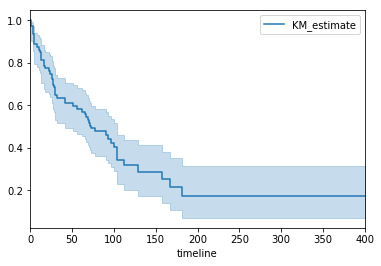

In [13]:
kmf.plot_survival_function()  # 생존 함수 그래프 

In [18]:
cancer1 = cancer.query('type == 1') 

In [19]:
kmf1 = KaplanMeierFitter()

In [20]:
kmf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1')

<lifelines.KaplanMeierFitter: fitted with 52 total observations, 21 right-censored observations>

In [ ]:
kmf1.survival_function_

In [ ]:
kmf1.cumulative_density_

In [43]:
kmf1.median_

C:\Users\user\Anaconda3\lib\site-packages\lifelines\fitters\kaplan_meier_fitter.py:287: FutureWarning: Please use `median_survival_time_` property instead. Future property `median_` will be removed.
  FutureWarning,


93.0

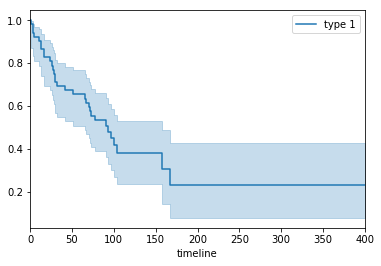

In [23]:
kmf1.plot_survival_function()

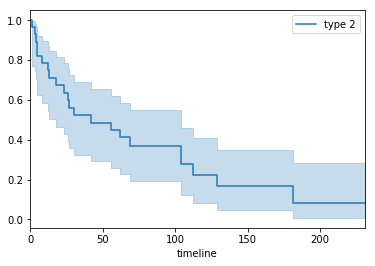

In [28]:
cancer2 = cancer.query('type == 2')
kmf2 = KaplanMeierFitter()
kmf2.fit(cancer2['time'], event_observed=cancer2['delta'], label='type 2')
kmf2.plot()

In [29]:
from matplotlib import pyplot

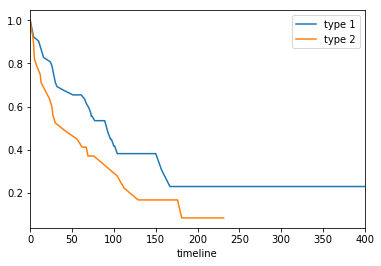

In [30]:
ax = kmf1.survival_function_.plot()
kmf2.survival_function_.plot(ax=ax)

In [31]:
from lifelines.statistics import logrank_test

In [34]:
summary = logrank_test(cancer1['time'], cancer2['time'], cancer1['delta'], cancer2['delta'], alpha=.95)

- p = 0.09이므로 95% 신뢰수준에서 같다
- 오차범위 내에 있다.
- (p < 0.05 작아야 차이가 난다고 할수 있음)

In [35]:
summary.print_summary()

<lifelines.StatisticalResult>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
             alpha = 0.95

---
 test_statistic    p  -log2(p)
           2.79 0.09      3.40


In [34]:
from lifelines import NelsonAalenFitter

In [35]:
naf1 = NelsonAalenFitter()

In [38]:
naf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1')

<lifelines.NelsonAalenFitter: fitted with 52 total observations, 21 right-censored observations>

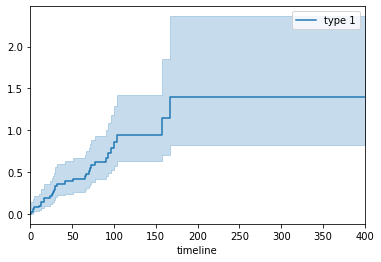

In [39]:
naf1.plot()

In [36]:
from lifelines import ExponentialFitter

In [37]:
ef1 = ExponentialFitter()

In [38]:
ef1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1 (Exponential)')

<lifelines.ExponentialFitter: fitted with 52 total observations, 21 right-censored observations>

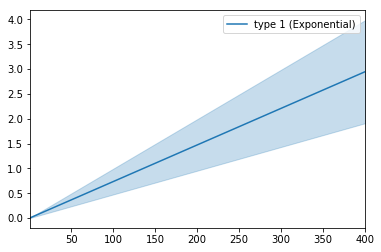

In [51]:
ef1.plot_cumulative_hazard()  # 누적위험함수

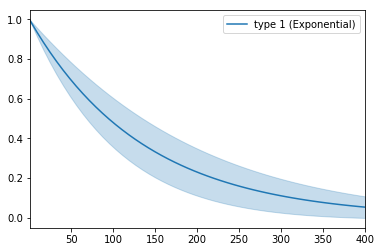

In [40]:
ef1.plot_survival_function()  # 생존 함수

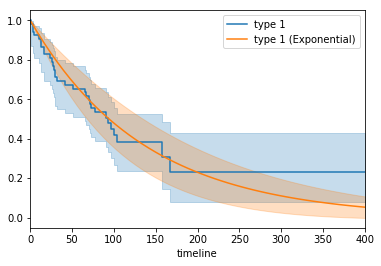

In [54]:
ax = kmf1.plot_survival_function()
ef1.plot_survival_function(ax=ax)

In [46]:
ef1.log_likelihood_

-183.24816317243193

In [47]:
2 * 1 - 2 * wf1.log_likelihood_  # AIC

366.9356548843635

In [41]:
from lifelines import WeibullFitter 

In [42]:
wf1 = WeibullFitter()

In [43]:
wf1.fit(cancer1['time'], event_observed=cancer1['delta'], label='type 1 (Weibul)')

<lifelines.WeibullFitter: fitted with 52 total observations, 21 right-censored observations>

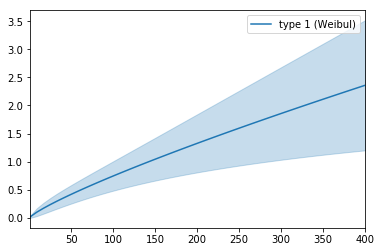

In [44]:
wf1.plot()   # 누적위험함수

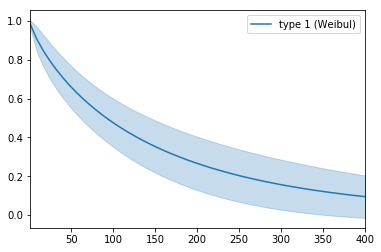

In [45]:
wf1.plot_survival_function()

In [48]:
wf1.log_likelihood_

-182.46782744218174

In [49]:
2 * 2 - 2 * wf1.log_likelihood_  # AIC

368.9356548843635

In [57]:
from lifelines.datasets import load_rossi

In [58]:
rossi = load_rossi()

In [59]:
rossi.head()

,week,arrest,fin,age,race,wexp,mar,paro,prio
0,20,1,0,27,1,0,0,1,3
1,17,1,0,18,1,0,0,1,8
2,25,1,0,19,0,1,0,1,13
3,52,0,1,23,1,1,1,1,1
4,52,0,0,19,0,1,0,1,3


- fin: 경제적 지원
- age: 나이
- race: 인종
- wexp: 직업 경험
- mar: 결혼
- paro: 가석방
- prio: 전과

In [60]:
from lifelines import CoxPHFitter

In [61]:
cph = CoxPHFitter()
cph.fit(rossi, duration_col='week', event_col='arrest', show_progress=True)

cph.print_summary()

Iteration 5: norm_delta = 0.00000, step_size = 1.0000, ll = -658.74766, newton_decrement = 0.00000, seconds_since_start = 0.1Convergence completed after 5 iterations.
<lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             duration col = 'week'
                event col = 'arrest'
   number of observations = 432
number of events observed = 114
   partial log-likelihood = -658.75
         time fit was run = 2019-10-07 06:32:44 UTC

---
       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
fin   -0.38       0.68       0.19            -0.75            -0.00                 0.47                 1.00
age   -0.06       0.94       0.02            -0.10            -0.01                 0.90                 0.99
race   0.31       1.37       0.31            -0.29             0.92                 0.75                 2.50
wexp  -0.15       0.86       0.21            -0.57             0.27    

### 결혼 유무

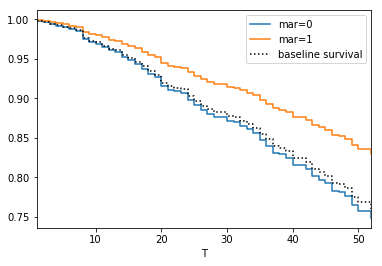

In [62]:
cph.plot_covariate_groups('mar', [0, 1])

### 나이

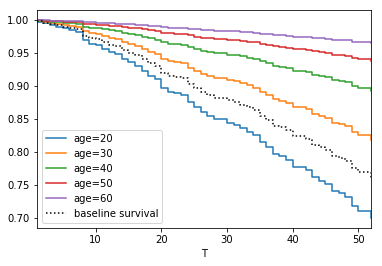

In [63]:
cph.plot_covariate_groups('age', [20, 30, 40, 50, 60])

### 결혼과 재정 지원의 조합

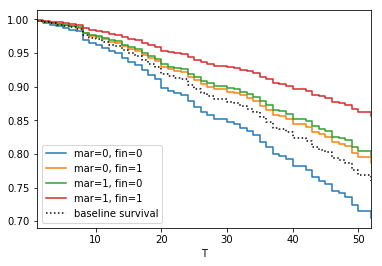

In [65]:
cph.plot_covariate_groups(
    ['mar', 'fin'],
    [(0, 0), (0, 1), (1, 0), (1, 1)]
)